In [ ]:
import zipfile, os
local_zip = '/content/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# Images Dimensions
img_width, img_height = 128, 128

train_data_dir = '/content/train'
validation_data_dir = '/content/validation'
nb_train_samples = 800
nb_validation_samples = 240
epochs = 50
batch_size = 16

Using TensorFlow backend.


In [ ]:
# TensorBoard Callbacks
callbacks = TensorBoard(log_dir='./Graph')

# Build VGG16
model = applications.VGG16(include_top=False, weights='imagenet')

# Training Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Rescale Testing Data
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Train Data Generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
train_features = model.predict_generator(
    train_generator, nb_train_samples // batch_size, verbose=1)
np.save('train_features.npy', train_features)

# Testing Data Generator
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
validation_features = model.predict_generator(
    validation_generator, nb_validation_samples // batch_size, verbose=1)
np.save('val_features.npy', validation_features)

Found 800 images belonging to 2 classes.
50/50 [==============================] - 8s 159ms/step
Found 240 images belonging to 2 classes.
15/15 [==============================] - 1s 74ms/step


In [ ]:
# Build Train Data
train_data = np.load('/content/train_features.npy')
train_labels = np.array(
    [0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

# Build Validation Data
validation_data = np.load('/content/val_features.npy')
validation_labels = np.array(
    [0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

In [ ]:
# Build FC Layer
fc_model = Sequential()
fc_model.add(Flatten(input_shape=train_data.shape[1:]))
fc_model.add(Dense(32, activation='relu'))
fc_model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Adam Optimizer and Cross Entropy Loss
adam = Adam(lr=0.001)
fc_model.compile(optimizer=adam,
                loss='binary_crossentropy', metrics=['accuracy'])

fc_model.fit(train_data, train_labels,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(validation_data, validation_labels), 
            callbacks=[callbacks])
            
fc_model.save_weights('vgg16.py')

Train on 800 samples, validate on 240 samples
Epoch 1/50
800/800 [==============================] - 0s 529us/step - loss: 0.7249 - accuracy: 0.5100 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 2/50
800/800 [==============================] - 0s 359us/step - loss: 0.6844 - accuracy: 0.5075 - val_loss: 0.7116 - val_accuracy: 0.4333
Epoch 3/50
800/800 [==============================] - 0s 364us/step - loss: 0.6714 - accuracy: 0.5775 - val_loss: 0.7168 - val_accuracy: 0.4375
Epoch 4/50
800/800 [==============================] - 0s 377us/step - loss: 0.6518 - accuracy: 0.6075 - val_loss: 0.7101 - val_accuracy: 0.4458
Epoch 5/50
800/800 [==============================] - 0s 383us/step - loss: 0.6258 - accuracy: 0.6637 - val_loss: 0.7472 - val_accuracy: 0.4750
Epoch 6/50
800/800 [==============================] - 0s 344us/step - loss: 0.5962 - accuracy: 0.7075 - val_loss: 0.7380 - val_accuracy: 0.4833
Epoch 7/50
800/800 [==============================] - 0s 368us/step - loss: 0.5602 - accur

In [ ]:
img_width, img_height = 128, 128

test_data_dir = '/content/testing'

def get_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    generator = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=1,
        class_mode='binary',
        shuffle=False)
    features = model.predict_generator(
        generator, 8)
    return features

def get_score():
    features = get_features()    

    model = Sequential()
    model.add(Flatten(input_shape=features.shape[1:]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
        
    model.load_weights('vgg16.py')

    score = model.predict(features)
    print(score)

get_score()

Found 8 images belonging to 1 classes.
[[1.3124238e-03]
 [1.6949630e-03]
 [4.6492147e-01]
 [4.2930278e-03]
 [3.6501118e-03]
 [1.1032242e-03]
 [6.7154646e-01]
 [3.4691475e-05]]


Populating the interactive namespace from numpy and matplotlib


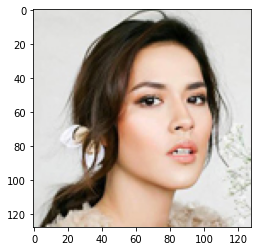

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/testing/face/2.jpg')
imgplot = plt.imshow(img)
plt.show()

PRE TRAINED MODEL

In [ ]:
from keras.applications import densenet
from keras.preprocessing import image
from keras import applications
from keras.applications.densenet import preprocess_input, decode_predictions
import numpy as np
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
import os

# Images Dimensions
img_width, img_height = 128, 128

train_data_dir = '/content/train'
validation_data_dir = '/content/validation'
nb_train_samples = 800
nb_validation_samples = 240
epochs = 50
batch_size = 16

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

category_dict = train_generator.class_indices
print(category_dict)

number_of_classes = len(category_dict)

model = applications.VGG16(include_top=False, weights='imagenet')
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
preds = Dense(1, activation='sigmoid')(x)

model = Model(inputs=model.input, outputs=preds)

In [ ]:
print(len(model.layers))

23


In [ ]:
# Set the first n_freeze layers of the network to be non-trainable.
n_freeze = 3
for layer in model.layers[:n_freeze]:
    layer.trainable=False
for layer in model.layers[n_freeze:]:
    layer.trainable=True

In [ ]:
adam = Adam(lr=0.001)
model.compile(optimizer=adam,
                loss='binary_crossentropy', metrics=['accuracy'])

step_size_train = train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator, 
                    steps_per_epoch=step_size_train, 
                    epochs=10)

XCEPTION

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# Images Dimensions
img_width, img_height = 128, 128

train_data_dir = '/content/train'
validation_data_dir = '/content/validation'
nb_train_samples = 800
nb_validation_samples = 240
epochs = 50
batch_size = 16

# TensorBoard Callbacks
callbacks = TensorBoard(log_dir='./Graph')

# Build VGG16
model = applications.Xception(include_top=False, weights='imagenet')

# Training Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Rescale Testing Data
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Train Data Generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
train_features = model.predict_generator(
    train_generator, nb_train_samples // batch_size, verbose=1)
np.save('train_features.npy', train_features)

# Testing Data Generator
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
validation_features = model.predict_generator(
    validation_generator, nb_validation_samples // batch_size, verbose=1)
np.save('val_features.npy', validation_features)

# Build Train Data
train_data = np.load('/content/train_features.npy')
train_labels = np.array(
    [0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

# Build Validation Data
validation_data = np.load('/content/val_features.npy')
validation_labels = np.array(
    [0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

# Build FC Layer
fc_model = Sequential()
fc_model.add(Flatten(input_shape=train_data.shape[1:]))
fc_model.add(Dense(32, activation='relu'))
fc_model.add(Dense(1, activation='sigmoid'))

# Adam Optimizer and Cross Entropy Loss
adam = Adam(lr=0.0001)
fc_model.compile(optimizer=adam,
                loss='binary_crossentropy', metrics=['accuracy'])

fc_model.fit(train_data, train_labels,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(validation_data, validation_labels), 
            callbacks=[callbacks])